# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [66]:

df_sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

mean = sum(df_sales)/len(df_sales)
mean

3052.714285714286

In [67]:
variance = sum([(cell - mean)**2 for cell in df_sales])/len(df_sales)
variance

183761.06122448976

In [68]:
std_sales = variance**.5
std_sales

428.67360686714756

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

df_sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
df_customer = [127, 80, 105, 92, 120, 115, 93]

cov = np.cov(df_customer,df_sales)
cov

array([[   290.95238095,   7604.35714286],
       [  7604.35714286, 214387.9047619 ]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [71]:
mean_cust = sum(df_customer)/len(df_customer)
variance_cust = sum([(cell - mean_cust)**2 for cell in df_customer])/len(df_customer)
std_customer = variance_cust**.5
std_customer

15.792015549069118

In [96]:
correlation_coefficient = cov/(std_customer*standard_deviation)
correlation_coefficient

array([[ 0.04297913,  1.12330631],
       [ 1.12330631, 31.66911826]])

In [99]:
np.corrcoef(df_customer, df_sales)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [76]:
url= "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv"
df = pd.read_csv(url)
df

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.000000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.916700,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,1306,3.0,0.0,"Zabour, Miss. Thamine",female,29.881135,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN,0
1306,1307,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.500000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN,0
1307,1308,3.0,0.0,"Zakarian, Mr. Ortin",male,27.000000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN,0
1308,1309,3.0,0.0,"Zimmerman, Mr. Leo",male,29.000000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN,0


In [91]:
#Calculate the variance-covariance matrix 
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [93]:
#correlation matrix
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?
synonym of orthogonal is perpendicularity

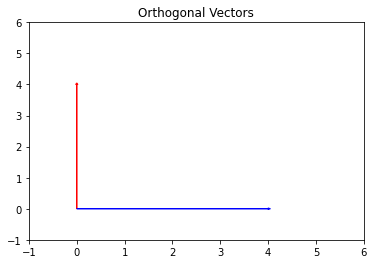

In [112]:
a = [0, 4]
b = [4, 0]

# Plot the Scaled Vectors
plt.arrow(0,0, a[0], a[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, b[0], b[1],head_width=.05, head_length=0.05, color ='blue')
plt.xlim(-1,6)          
plt.ylim(-1,6)
plt.title("Orthogonal Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?
It is not orthogonal because the dot product is not 0
\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [119]:
a = np.array([[-5],
              [3],
              [7]])

b = np.array([[6],
              [-8],
              [2]])  

(a*b).sum()

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [128]:
#What is  ||c||2 ?

c = [2,-15, 6, 20]
norm_c = (sum([(cell)**2 for cell in c]))**.5

#||c||**2
norm_c**2

665.0

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

**Linear combination of scalar**

\begin{align}
d = \begin{bmatrix} 7 \\ 12\end{bmatrix}
\end{align}


\begin{align}
d = \begin{bmatrix} 7\\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}



\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8\end{bmatrix}
\end{align}


\begin{align}
d = \begin{bmatrix} 2 \\ 11 \\ -8\end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\1 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\0\end{bmatrix} + (-8)\begin{bmatrix} 1 \\ 0 \\1 \end{bmatrix} = 2\hat{i} + 11\hat{j} + (-8)\hat{k}
\end{align}

**Unit Vector**

\begin{align}
 d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\end{align}


 
 \begin{align}
 ||d|| = \sqrt{7^2 + 12^2 } = \sqrt{49 + 144} = \sqrt{193} = 13.9 
\end{align}
*I rounded ||d|| = 14*


 \begin{align}
 \hat{d} = \frac{1}{||d||}d = \frac{1}{14}\begin{bmatrix} 7 \\ 12 \end{bmatrix} = \begin{bmatrix} \frac{7}{14} \\ \frac{12}{14} \end{bmatrix}
\end{align}

\begin{align}
 d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\end{align}


 \begin{align}
 d = \begin{bmatrix} 2 \\ 11 \\-8\end{bmatrix}
\end{align}

 \begin{align}
 ||e|| = \sqrt{2^2 + 11^2 + -8^2} = \sqrt{4 + 121 + 64} = \sqrt{189} = 13.7 
\end{align}

*I rounded  ||e|| = 14*


 \begin{align}
 \hat{e} = \frac{1}{||e||}e = \frac{1}{14}\begin{bmatrix} 2 \\ 11\\-8 \end{bmatrix} = \begin{bmatrix} \frac{2}{14} \\ \frac{11}{14}\\ \frac{-8}{14} \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

\begin{align}
 ||f|| = \sqrt{4^2 + 12^2 + 11^2 + 2^2} = \sqrt{16 + 144 + 121 + 4} = \sqrt{285} = 16.8
\end{align}
*I rounded ||f|| = 17*


 \begin{align}
 \hat{f} = \frac{1}{||f||}f = \frac{1}{17}\begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix} = \begin{bmatrix} \frac{4}{17} & \frac{12}{17} & \frac{11}{17} & \frac{9}{17} & \frac{2}{17}  \end{bmatrix}
\end{align}

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

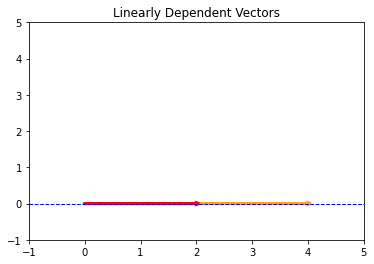

In [150]:
# Plot Linearly Dependent Vectors

# Axis Bounds
plt.xlim(-1,5)          
plt.ylim(-1,5)


#Vectors
v1 = [4,0]
v2 = [2,0]

#Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v1[0], v1[1], linewidth=3, head_width=.05, head_length=0.05, color ='orange')
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Dependent Vectors")
plt.show()

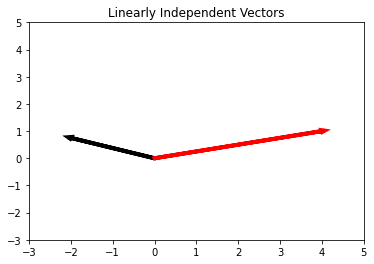

In [157]:
# Plot Linearly independent Vectors

# Axis Bounds
plt.xlim(-3,5)          
plt.ylim(-3,5)

# Vectors
a = [-2,.75] 
b = [4, 1]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=4, head_width=.07, head_length=0.07, color ='black')
plt.arrow(0,0, b[0], b[1], linewidth=4, head_width=.07, head_length=0.07, color ='red')

plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [161]:
import numpy as np
x = np.array([[1,0],[0,1]])
g = ([1, 2])
span = np.linalg.solve(x,g)
span


array([1., 2.])

In [162]:

x = np.array([[1,0],[0,1]])
h = ([4, 8])
span = np.linalg.solve(x,h)
span

array([4., 8.])

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [164]:
x = np.array([[0,0,1],[0,1,0],[1,0,0]])
l = ([1, 2, 3])
m = ([-1, 0, 7])
n = ([4, 8, 2])
span = np.linalg.solve(x,l)
span

array([3., 2., 1.])

In [165]:
span = np.linalg.solve(x,m)
span

array([ 7.,  0., -1.])

In [166]:
span = np.linalg.solve(x,n)
span

array([2., 8., 4.])

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

Form a basis is a way to set element in vector space

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

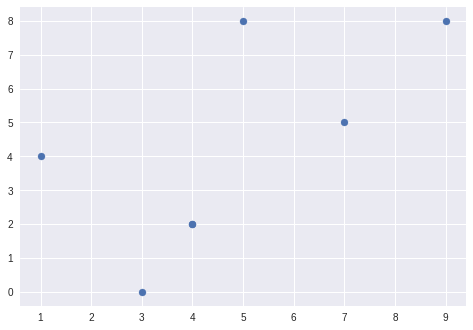

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()